In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('police.csv')
df

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [3]:
# размеры датафрейма
len(df)

91741

In [4]:
# типы данных в датафрейме
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [5]:
# количество отсутствующих данных
df.isna().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [6]:
# удаляем пустой столбец
df.drop('county_name', axis='columns', inplace=True)
df.dropna(axis=1, how='all', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   driver_gender       86406 non-null  object 
 3   driver_age_raw      86414 non-null  float64
 4   driver_age          86120 non-null  float64
 5   driver_race         86408 non-null  object 
 6   violation_raw       86408 non-null  object 
 7   violation           86408 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3196 non-null   object 
 10  stop_outcome        86408 non-null  object 
 11  is_arrested         86408 non-null  object 
 12  stop_duration       86408 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(2), object(10)
memory usage: 8.6+ MB


### Кто чаще нарушает скоростной режим - женщины или мужчины

In [7]:
df[df.violation == 'Speeding'].driver_gender.value_counts()

driver_gender
M    32979
F    15482
Name: count, dtype: int64

Чаще нарушают мужчины

### Bлияет ли пол водителя на проведение розыска во время остановки

In [8]:
df.groupby('driver_gender').search_conducted.value_counts(normalize=True)

driver_gender  search_conducted
F              False               0.979967
               True                0.020033
M              False               0.956674
               True                0.043326
Name: proportion, dtype: float64

У мужчин обыск во время остановки проводят чаще, но отличия незначительны

### Как часто водителя обыскивают

In [9]:
probability = len(df[df['search_type'] == 'Protective Frisk'])/ df.search_type.count()
print('Вероятность обыска: ', probability)

Вероятность обыска:  0.050375469336670836


### Верно ли, что большинство остановок происходило ночью?

In [10]:
night = df[(df['stop_time'] < '07:00')&(df['stop_time'] >= '00:00')]
print(len(night))
day = df[(df['stop_time'] <= '23:59')&(df['stop_time'] >= '07:00')]
print(len(day))

17564
74177


<Axes: xlabel='stop_time'>

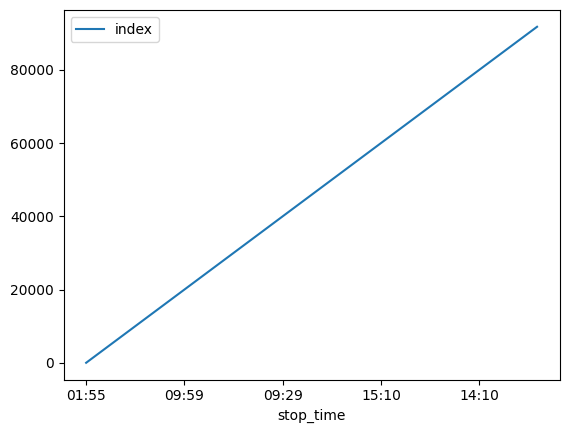

In [11]:
df.reset_index().plot(x = 'stop_time', y='index' )

Нет, большинство остановок происходило днем

### Рассчитать возрастное распределение для каждого нарушения

In [12]:
df.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


<Axes: title={'center': 'Moving violation'}, ylabel='Frequency'>

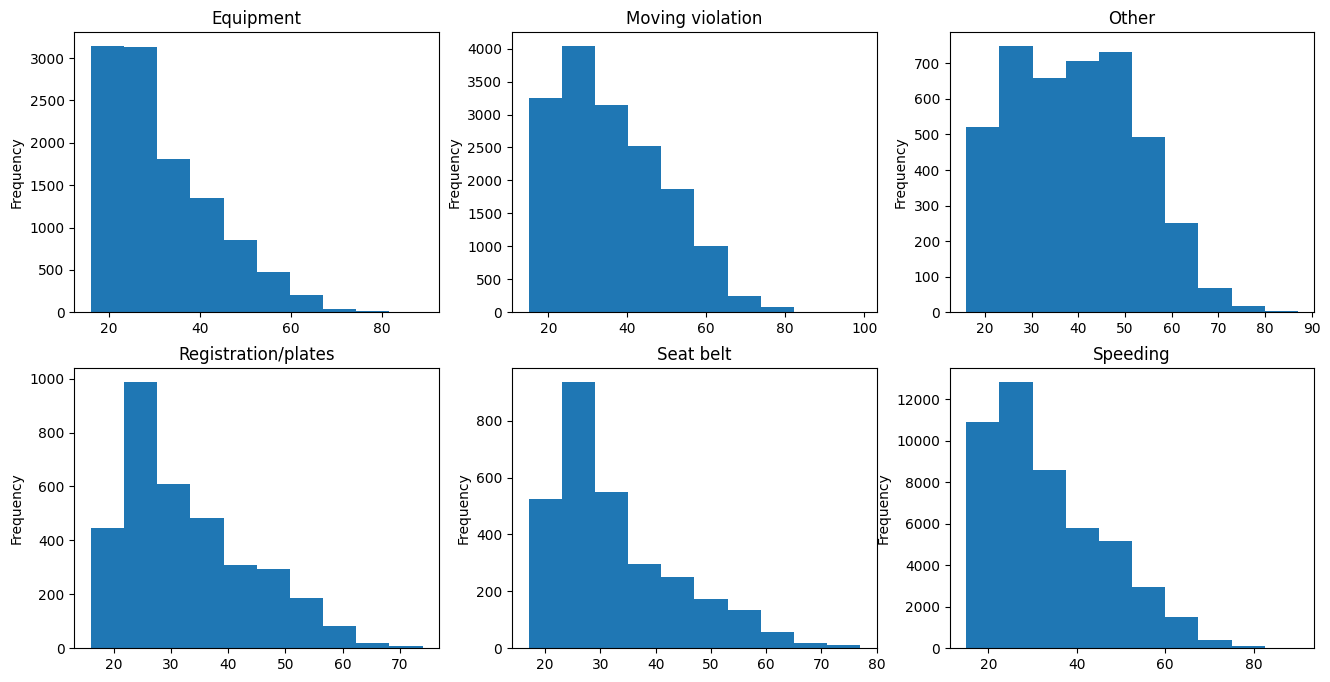

In [13]:
figures, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
df[df.violation == 'Speeding'].driver_age.plot(kind='hist', ax=ax[1,2], title='Speeding')
df[df.violation == 'Seat belt'].driver_age.plot(kind='hist', ax=ax[1,1], title='Seat belt')
df[df.violation == 'Registration/plates'].driver_age.plot(kind='hist', ax=ax[1,0], title='Registration/plates')
df[df.violation == 'Other'].driver_age.plot(kind='hist', ax=ax[0,2], title='Other')
df[df.violation == 'Equipment'].driver_age.plot(kind='hist', ax=ax[0,0], title='Equipment')
df[df.violation == 'Moving violation'].driver_age.plot(kind='hist', ax=ax[0,1], title='Moving violation')